# Effects of individuals that makes more rides, and the most time rides takes place in
## By Ashraf Samir Aly

## Investigation Overview

Our goal is to figuring out what features of individuals that makes more rides, what is the most time rides takes place in and how long rides takes in the dataset.

## Dataset Overview

There are 174,952 rides in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude,(same for end station), bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip ). Most variables are numeric in nature, but the variables member_gender(ordered factor), start_station_name, user_type and end_station_name are categorical. ordered factor variables with the following levels.

(worst) ——> (best)<br>
member_gender: Male, Female, Other 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
fordgobike = pd.read_csv('new_fordgobike.csv')

## Distribution of Rented Bikes of Different User Types and Genders.

Plotting the count plot for gender types shows how large males are renting bikes over the females.
<br>
The other count plot for user types shows that the subscribers have much higher bike renting rates than cutomers.

In [28]:
# Change to categorey data type
fordgobike.member_gender = pd.Categorical(np.array(fordgobike.member_gender), categories=['Male', 'Female', 'Other'], ordered=True)

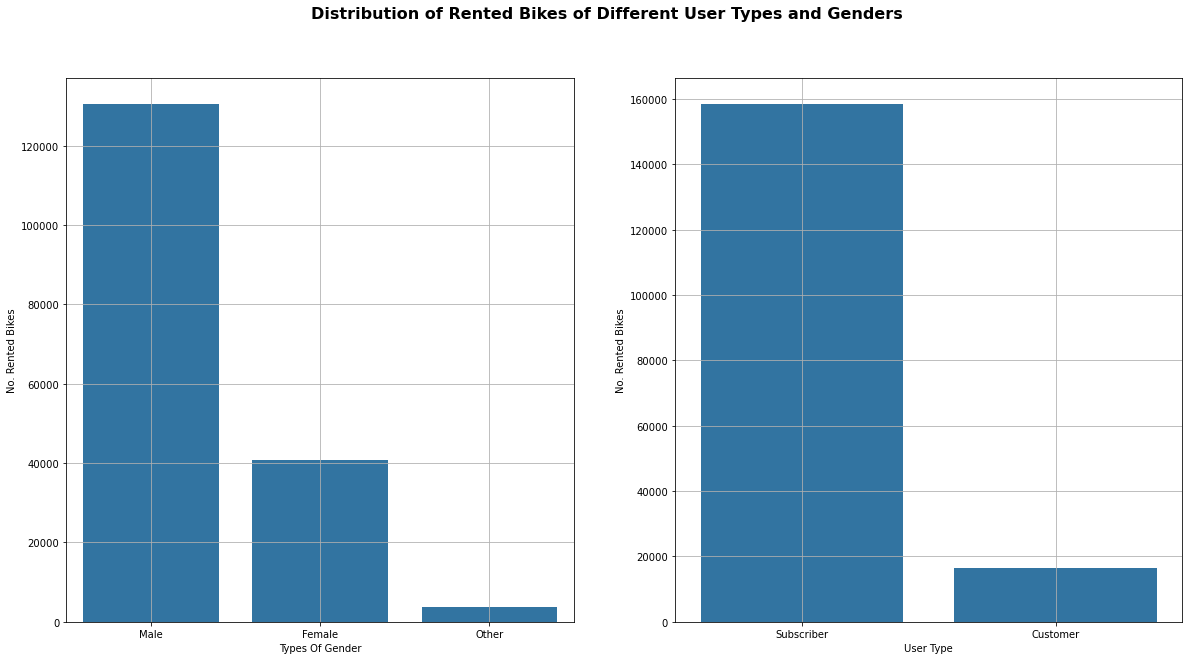

In [29]:
# Distributions of member_gender and user_type

base_color = sb.color_palette()[0]

fig, axis = plt.subplots(ncols = 2, figsize = [20,10])
sb.countplot(data = fordgobike, x = 'member_gender', color = base_color, ax = axis[0])
plt.sca(axis[0])
plt.xlabel('Types Of Gender')
plt.ylabel('No. Rented Bikes')
plt.grid()

sb.countplot(data = fordgobike, x = 'user_type', color = base_color, ax = axis[1], order=['Subscriber','Customer'])
plt.sca(axis[1])
plt.xlabel('User Type')
plt.ylabel('No. Rented Bikes')
plt.grid()

plt.suptitle('Distribution of Rented Bikes of Different User Types and Genders', fontsize = 16, fontweight = 'bold');

## Distribution of Rented Bikes of Different User Types and Genders in week days.

Thursday is the higher number of rented bikes for males as also for females, while the least day was sunday for both males and females with males is the highest number of renting bikes.
Thursday is the higher number of rented bikes for subscribers as also for customers, while the least day was sunday for subscribers and wednesday for customers with subscribers is the highest number of renting bikes.

In [30]:
# countplot function
def count_plt(c, z, axd):
    sb.countplot(data = fordgobike, x = c, hue = z, ax = axd)
    plt.sca(axd)
    plt.xticks(rotation = 45)

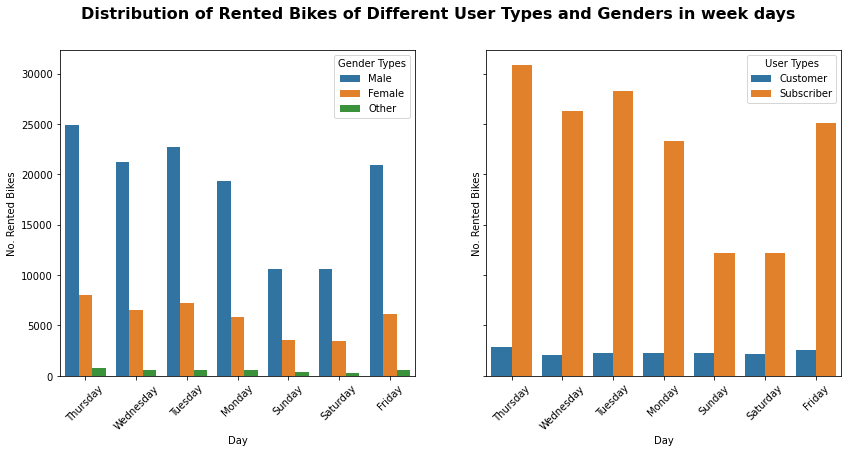

In [27]:
# count plot for member_gender and user_type in week days
figure, axis = plt.subplots(ncols = 2, sharey = True, figsize = (14, 6))
count_plt('day', 'member_gender', axis[0])

plt.xlabel('Day')
plt.ylabel( 'No. Rented Bikes')
plt.legend(title='Gender Types')

count_plt('day', 'user_type', axis[1])

plt.xlabel('Day')
plt.ylabel( 'No. Rented Bikes')
plt.legend(title='User Types')

plt.suptitle('Distribution of Rented Bikes of Different User Types and Genders in week days', fontsize = 16, fontweight = 'bold');


## Average Duration for Renting Bikes for ach Gender Type in Week Days.

<ul>
<li> Females are clearly have average duration higher than males.</li>
<li> Both of males and females have higher average duration in Saturday and Sunday.</li>
</ul>

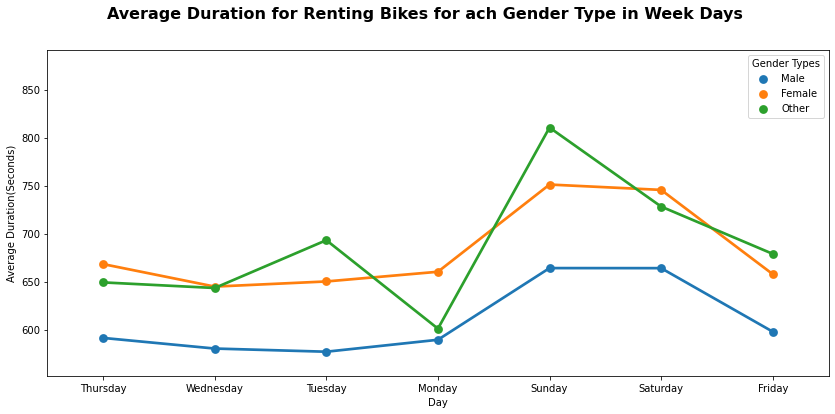

In [34]:
# Plot the 3 variables day, duration, gender
split_data = fordgobike[['day', 'hour','member_birth_year','member_gender','duration_sec']].query('duration_sec >= 104 & duration_sec <= 3176')
figure, axis = plt.subplots( sharey = True, figsize = (14, 6))
sb.pointplot(data = split_data, x = 'day', y = 'duration_sec', hue = 'member_gender', linestyles = '-', errwidth = 0);

plt.xlabel('Day')
plt.ylabel('Average Duration(Seconds)')
plt.legend(title='Gender Types')

plt.suptitle('Average Duration for Renting Bikes for ach Gender Type in Week Days', fontsize = 16, fontweight = 'bold');